In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import  seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('/home/xcrown/workshop/RL-trader/RL_trader_env/data/all_stocks_5yr.csv')
df.drop('Name',axis=1,inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

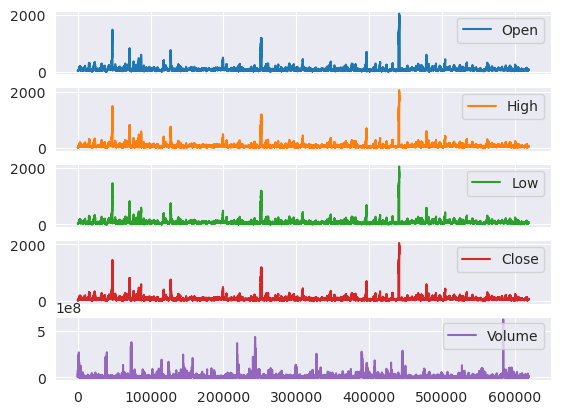

In [3]:
df.plot(subplots=True)
plt.show()

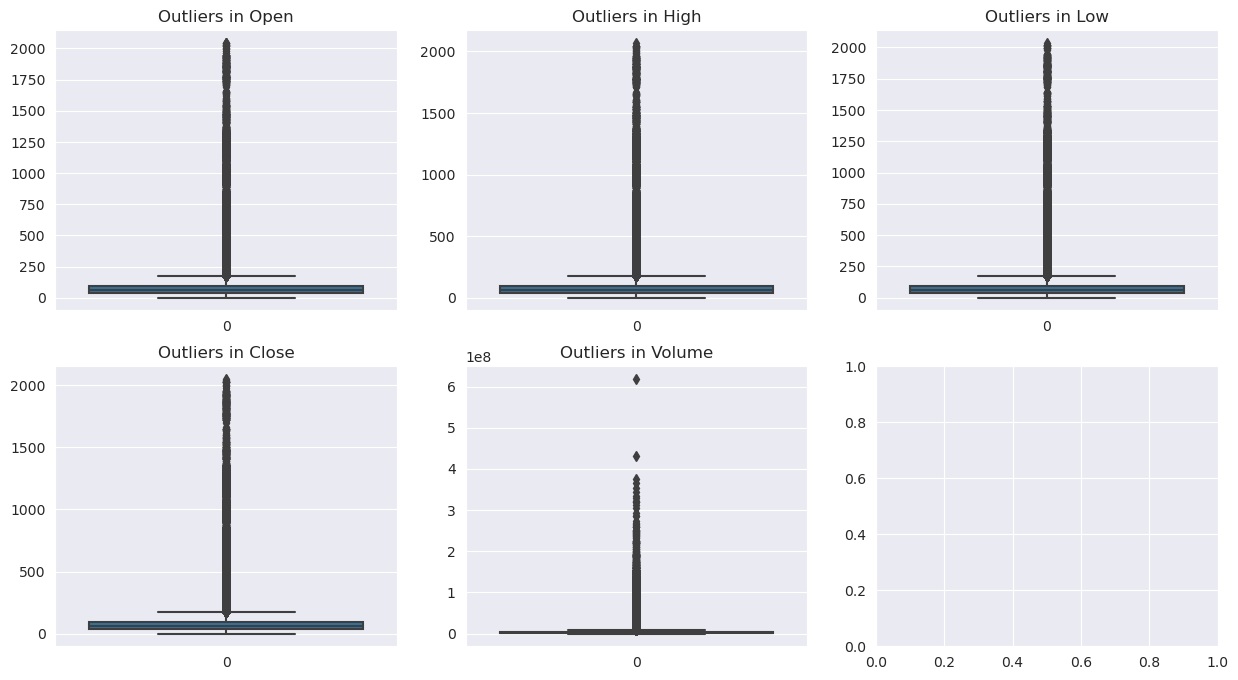

In [4]:
# Creating a figure with 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Creating a counter to keep track of the current subplot
counter = 0

# Iterating through all columns of the dataframe
for column in df.drop('Date',axis=1).columns:
    if column == 'date_time':
        continue
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(df[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1

# Showing the plot
plt.show()

In [5]:
from scipy.stats import zscore
# Calculate the z-scores
z_scores = zscore(df.drop('Date',axis=1))

# Define the threshold
threshold = 3

# Identify the outliers
outliers = np.where(np.abs(z_scores) > threshold)

dataset_no_outliers = df[(z_scores < threshold).all(axis=1)]

dataset_no_outliers.shape

(600847, 6)

The Local Outlier Factor (LOF) method, which is a density-based method for identifying outliers. The LOF algorithm calculates the local density deviation of a given data point with respect to its neighbors. A point with a high LOF score is considered an outlier, as it has a significantly lower density compared to its neighboring points. This method can be useful for detecting outliers in high-dimensional data.

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Creating an instance of the LocalOutlierFactor class
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fiting the model to the data
lof.fit(df.drop('Date',axis=1))

# Geting the outlier scores for each data point
scores = lof.negative_outlier_factor_

# Identifing the outliers based on a threshold value
outliers_lof = df[scores < -threshold].index
df.drop(outliers_lof,inplace=True)

In [7]:
df.reset_index(inplace=True)

In [8]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Generate some sample data
X = df.drop('Date',axis=1).to_numpy()
# Calculate the mean and covariance matrix of the data
mean = np.mean(X, axis=0)
cov = np.cov(X.T)

# Calculate the inverse of the covariance matrix
inv_cov = np.linalg.inv(cov)

# Calculate the Mahalanobis distance for each data point
distances = []
for x in X:
    d = mahalanobis(x, mean, inv_cov)
    distances.append(d)

# Calculate the threshold for outlier detection
alpha = 0.05
threshold = chi2.ppf(1 - alpha, X.shape[1])

# Identify the outliers
outliers = np.where(distances > threshold)[0]
df.drop(outliers, inplace = True)

In [9]:
# Calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

/tmp/ipykernel_50009/2903213727.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/tmp/ipykernel_50009/2903213727.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/tmp/ipykernel_50009/2903213727.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,index,Date,Open,High,Low,Close,Volume
0,0,2/8/2013,15.07,15.12,14.63,14.75,8407500
1,1,2/11/2013,14.89,15.01,14.26,14.46,8882000
2,2,2/12/2013,14.45,14.51,14.10,14.27,8126000
9,9,2/22/2013,13.57,13.60,13.21,13.57,6071400
10,10,2/25/2013,13.60,13.76,13.00,13.02,7186400
...,...,...,...,...,...,...,...
614859,619035,2/1/2018,76.84,78.27,76.69,77.82,2982259
614860,619036,2/2/2018,77.53,78.12,76.73,76.78,2595187
614861,619037,2/5/2018,76.64,76.92,73.18,73.83,2962031
614862,619038,2/6/2018,72.74,74.56,72.13,73.27,4924323


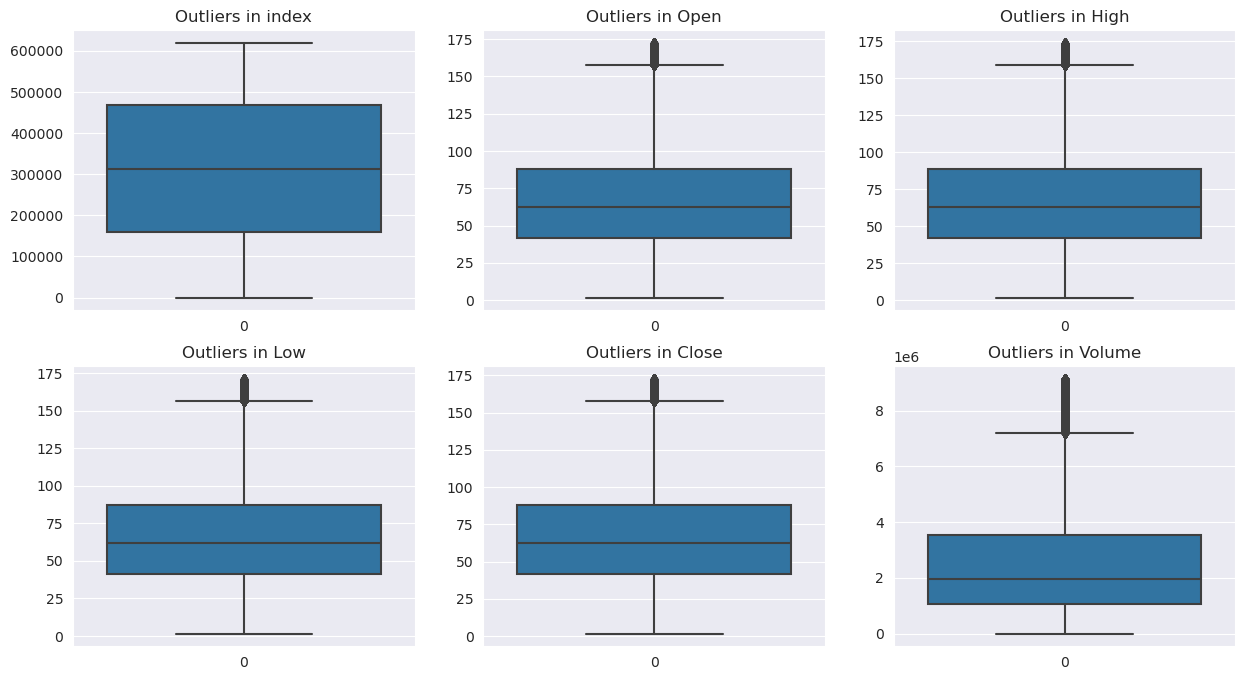

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Creating a counter to keep track of the current subplot
counter = 0

# Iterating through all columns of the dataframe
for column in df.drop('Date',axis=1).columns:
    if column == 'date_time':
        continue
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(df[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1

# Showing the plot
plt.show()

In [11]:
# df.to_csv('../../../data/final-2.csv', index=False)